#Sprint 3, T05

##Nivell 1

###Execise 1 - Explode database with Pandas

In [9]:
import pandas as pd
import numpy as np
my_df = pd.read_csv('DelayedFlights.csv')
my_df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [10]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [11]:
my_df.shape

(1936758, 30)

In [12]:
#Deleting all columns with no values
my_df.drop('Unnamed: 0', inplace=True, axis=1)
my_df.drop('Year', inplace=True, axis=1)
my_df.drop('DepTime', inplace=True, axis=1)
my_df.drop('ArrTime', inplace=True, axis=1)
my_df.drop('ActualElapsedTime', inplace=True, axis=1)
my_df.drop('Diverted', inplace=True, axis=1)

In [13]:
my_df.shape

(1936758, 24)

###Execise 2 - Analysis of data

In [14]:
#Missing values by column
print(my_df.isnull().sum())

Month                     0
DayofMonth                0
DayOfWeek                 0
CRSDepTime                0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64


In [20]:
#Creating mean value for missing values of one column
ElapsedTime = my_df['CRSElapsedTime']
ElapsedTime_mean = ElapsedTime.mean()
ElapsedTime.fillna(ElapsedTime_mean,inplace=True)

In [21]:
print(my_df.isnull().sum())

Month                     0
DayofMonth                0
DayOfWeek                 0
CRSDepTime                0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
CRSElapsedTime            0
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
HasDelay                  0
dtype: int64


In [15]:
#Creating new column
my_df['HasDelay'] = np.where(my_df['ArrDelay'] >= 0, True, False)

In [16]:
my_df[['ArrDelay', 'HasDelay']]

,ArrDelay,HasDelay
0,-14.0,False
1,2.0,True
2,14.0,True
3,34.0,True
4,11.0,True
...,...,...
1936753,25.0,True
1936754,75.0,True
1936755,99.0,True
1936756,9.0,True


In [25]:
#Airlines with the most delayed flights
#Get description of Unique Carrier - there are 20 different airlines
my_df['UniqueCarrier'].describe()

count     1936758
unique         20
top            WN
freq       377602
Name: UniqueCarrier, dtype: object

In [26]:
new_df = my_df.groupby(['UniqueCarrier'])['ArrDelay'].sum()
new_df.sort_values()

UniqueCarrier
AQ       15814.0
HA      255613.0
F9      788549.0
AS     1406735.0
9E     2420468.0
OH     2675993.0
B6     3025749.0
FL     3100150.0
NW     3462075.0
US     3571867.0
YV     3691461.0
EV     3888131.0
CO     4045932.0
DL     4535644.0
XE     5176042.0
OO     5978936.0
MQ     6396704.0
UA     6733013.0
AA     8889066.0
WN    11319092.0
Name: ArrDelay, dtype: float64

###Airline with code WN has acumulated the most delays.

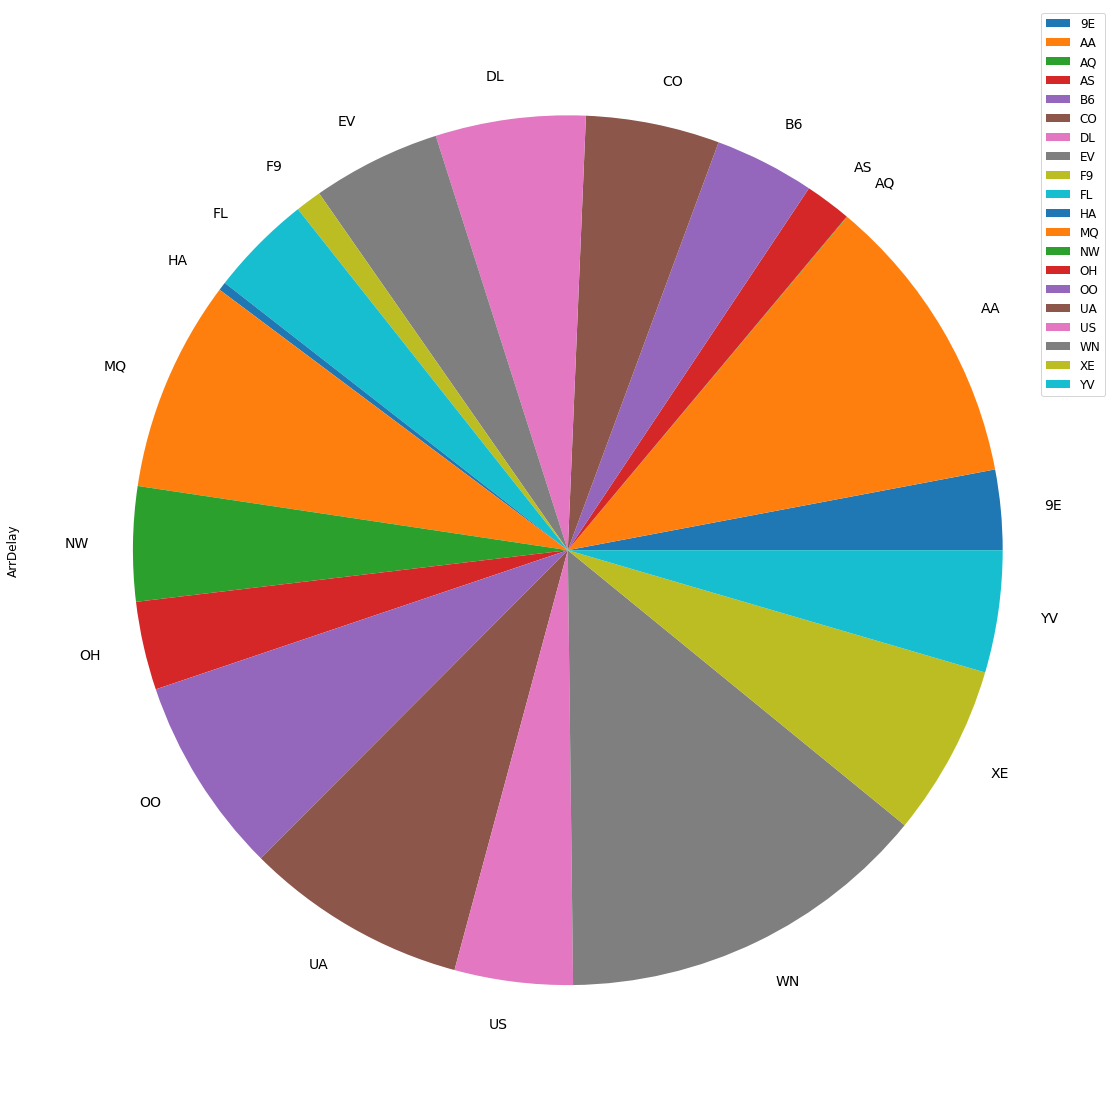

In [118]:
import matplotlib.pyplot as plt
test_df = pd.DataFrame(new_df)
plot = test_df.plot.pie(y='ArrDelay', figsize=(20, 20), fontsize=14)

In [119]:
#Longest flights
sorted_df = my_df.sort_values(['AirTime'], ascending=False)
sorted_df[['UniqueCarrier', 'FlightNum', 'AirTime']]

,UniqueCarrier,FlightNum,AirTime
1488690,HA,21,1091.0
1367047,HA,28,733.0
362529,CO,15,664.0
556381,CO,15,655.0
556385,CO,15,654.0
...,...,...,...
1935651,DL,1706,NaN
1935716,DL,26,NaN
1935876,DL,892,NaN
1935978,DL,1102,NaN


In [120]:
#The most delayed flights
sorted_df = my_df.sort_values(['ArrDelay'], ascending=False)
sorted_df[['UniqueCarrier', 'FlightNum', 'ArrDelay']]

,UniqueCarrier,FlightNum,ArrDelay
322516,NW,808,2461.0
686014,NW,1699,2453.0
839306,NW,1107,1951.0
1009553,MQ,3538,1707.0
1881639,NW,357,1655.0
...,...,...,...
1935651,DL,1706,NaN
1935716,DL,26,NaN
1935876,DL,892,NaN
1935978,DL,1102,NaN


In [129]:
export_df = my_df.head(100)#Export only 100 first rows to keep file small
export_df

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,CRSElapsedTime,AirTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,HasDelay
0,1,3,4,1955,2225,WN,335,N712SW,150.0,116.0,...,4.0,8.0,0,N,NaN,NaN,NaN,NaN,NaN,False
1,1,3,4,735,1000,WN,3231,N772SW,145.0,113.0,...,5.0,10.0,0,N,NaN,NaN,NaN,NaN,NaN,True
2,1,3,4,620,750,WN,448,N428WN,90.0,76.0,...,3.0,17.0,0,N,NaN,NaN,NaN,NaN,NaN,True
3,1,3,4,1755,1925,WN,3920,N464WN,90.0,77.0,...,3.0,10.0,0,N,2.0,0.0,0.0,0.0,32.0,True
4,1,3,4,1915,2110,WN,378,N726SW,115.0,87.0,...,4.0,10.0,0,N,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,3,4,1510,2255,WN,3144,N272WN,285.0,269.0,...,4.0,22.0,0,N,13.0,0.0,10.0,0.0,39.0,True
96,1,3,4,1715,1820,WN,82,N499WN,65.0,42.0,...,6.0,12.0,0,N,0.0,0.0,0.0,12.0,6.0,True
97,1,3,4,2150,2255,WN,135,N244WN,65.0,40.0,...,7.0,12.0,0,N,NaN,NaN,NaN,NaN,NaN,True
98,1,3,4,1825,1930,WN,317,N335SW,65.0,41.0,...,16.0,16.0,0,N,18.0,0.0,8.0,0.0,8.0,True


In [136]:
export_df.to_excel(r'newDataFrame.xlsx', sheet_name='Sheet1')

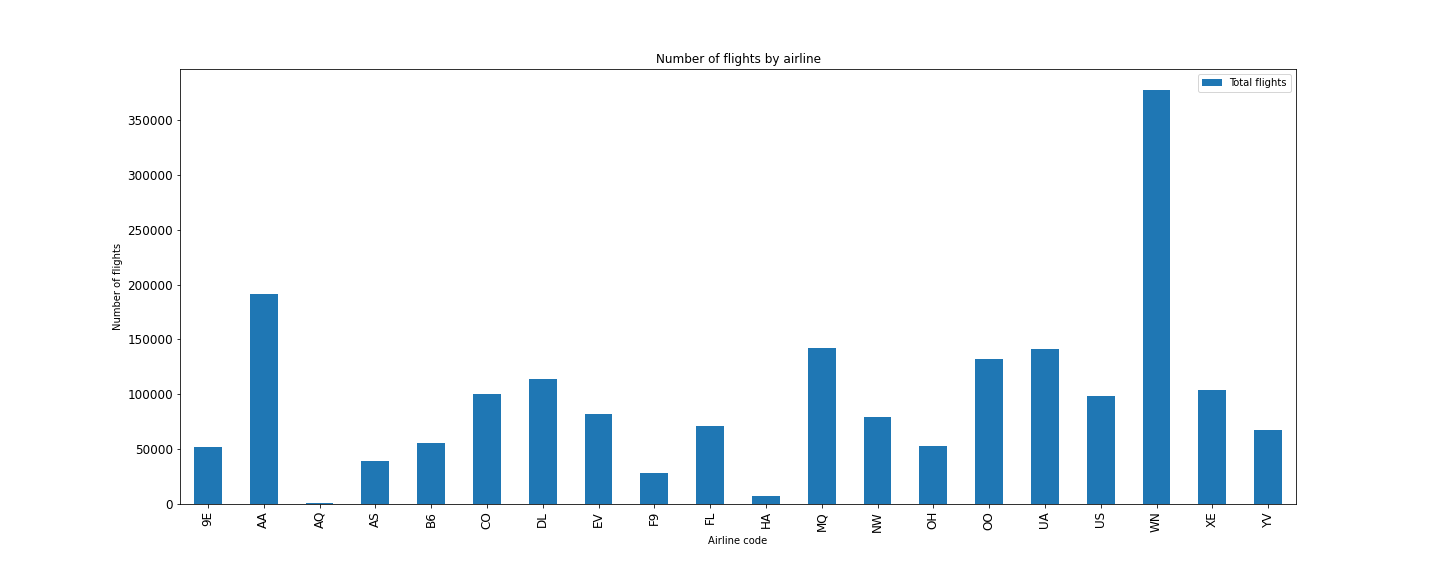

In [33]:
from IPython import display
display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig1.png")

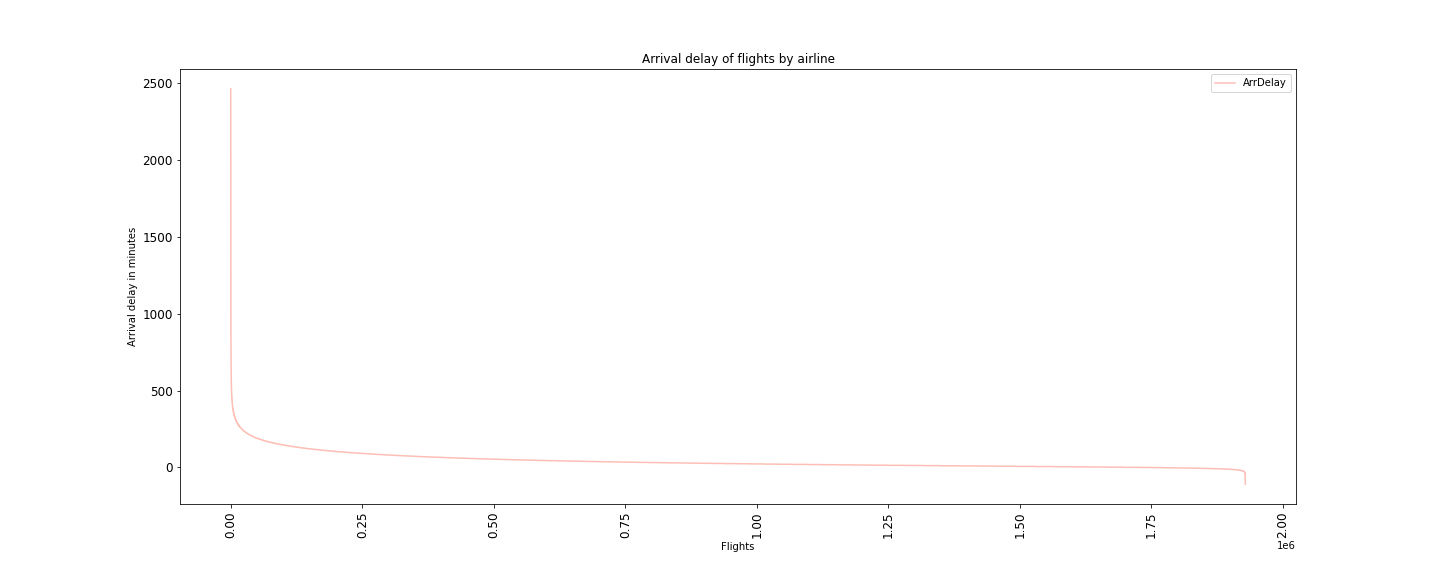

In [34]:
display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig2.png")

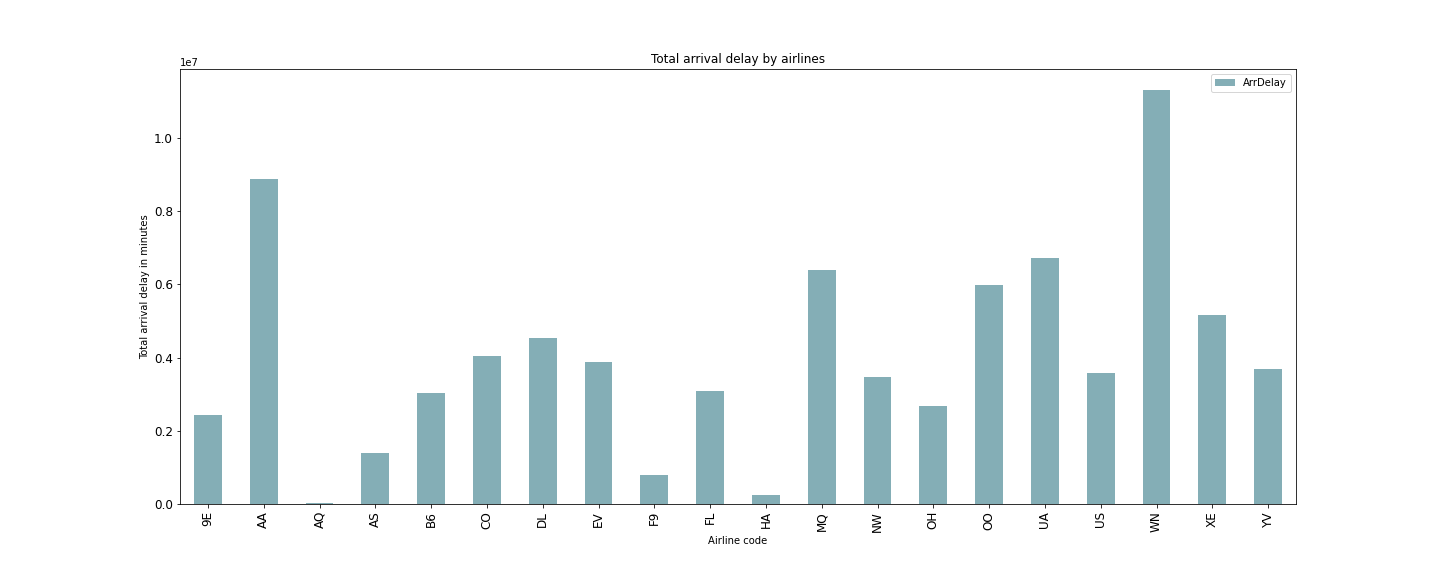

In [35]:
display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig3.png")

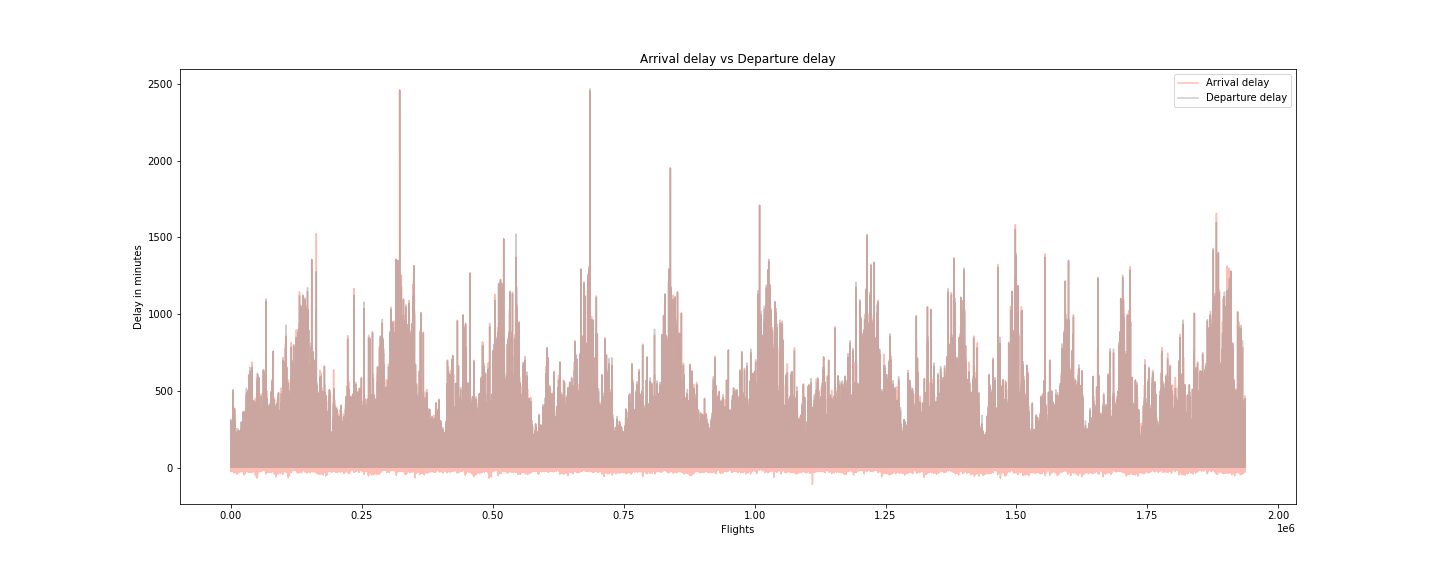

In [36]:
display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig4.png")

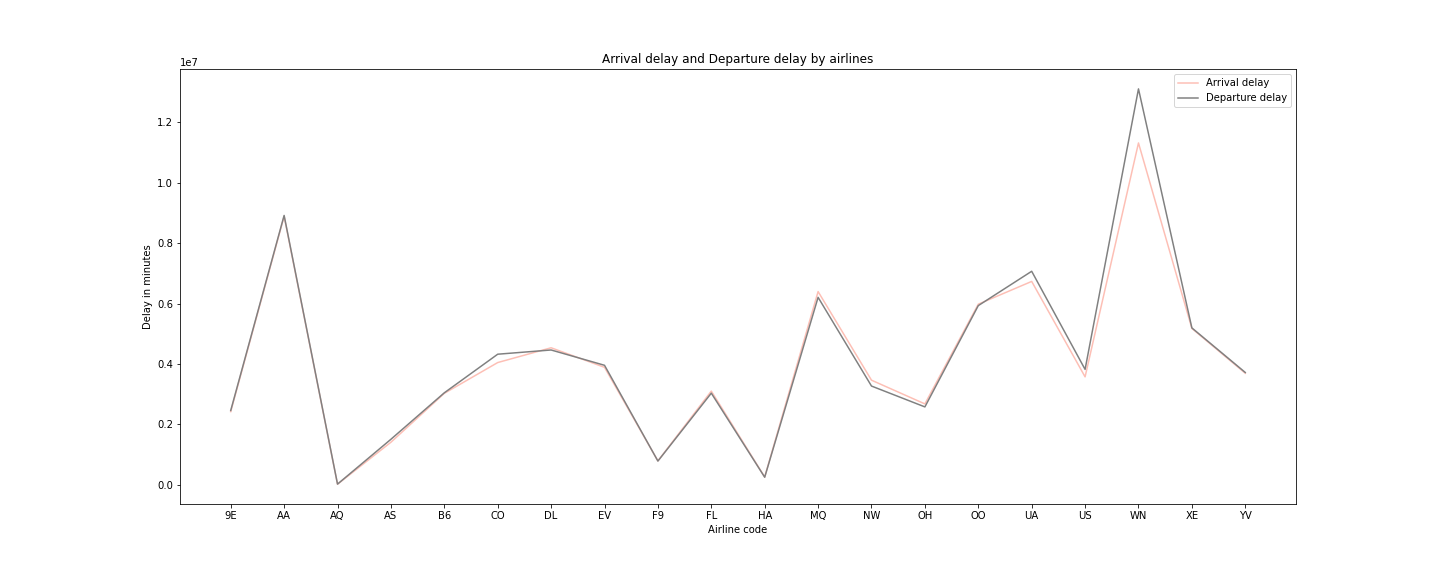

In [37]:
display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig5.png")

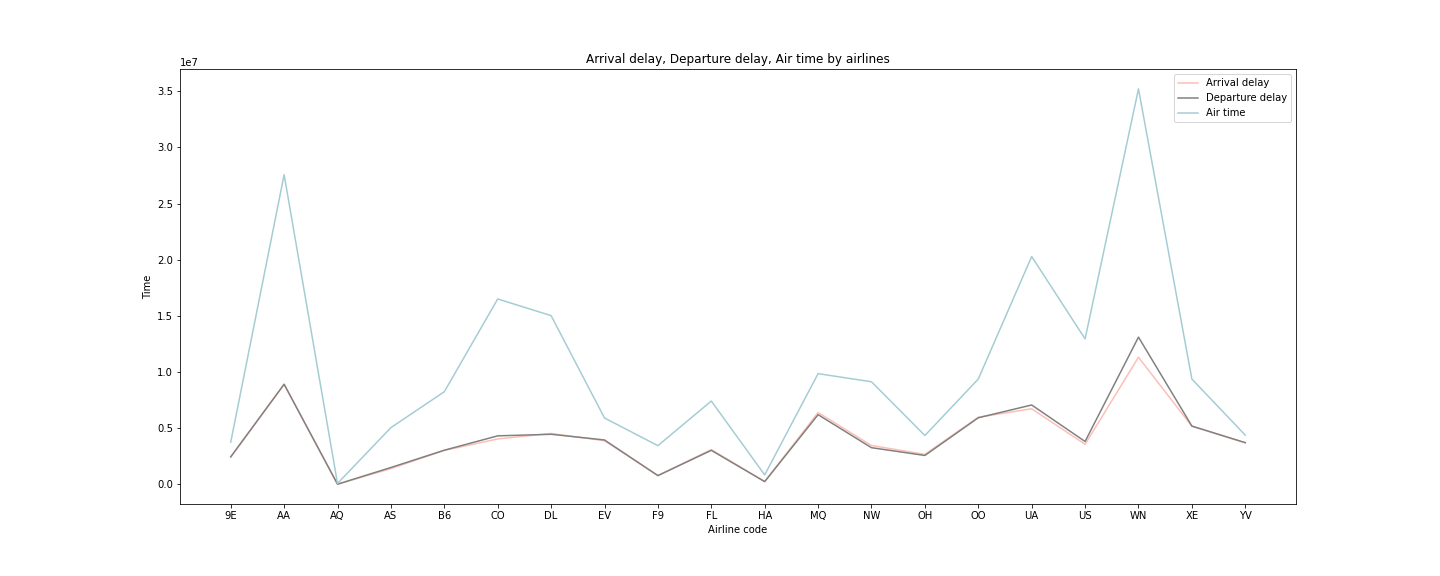

In [38]:
display.Image("https://raw.githubusercontent.com/dominikapetru/visualitzacio_exploratoria/main/fig6.png")